Step 1 — Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import shap
import joblib
import warnings
warnings.filterwarnings("ignore")


d:\MY-DSMLAI\Projects\ML-pjt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Step 2 — Load Dataset

In [4]:
url = "https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/diagnosis.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip()
df.head()



,temperature\tnausea\tlumbar_pain\turine_pushing\tmicturition_pain\tburning \tinflammation\tnephritis
0,35.5\tno\tyes\tno\tno\tno\tno\tno
1,35.9\tno\tno\tyes\tyes\tyes\tyes\tno
2,35.9\tno\tyes\tno\tno\tno\tno\tno
3,36\tno\tno\tyes\tyes\tyes\tyes\tno
4,36\tno\tyes\tno\tno\tno\tno\tno


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 1 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   temperature	nausea	lumbar_pain	urine_pushing	micturition_pain	burning 	inflammation	nephritis  120 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


,temperature\tnausea\tlumbar_pain\turine_pushing\tmicturition_pain\tburning \tinflammation\tnephritis
count,120
unique,99
top,37\tno\tno\tyes\tyes\tyes\tyes\tno
freq,4


Step 3 — Data Preprocessing

In [7]:

# Encode categorical values
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,temperature\tnausea\tlumbar_pain\turine_pushing\tmicturition_pain\tburning \tinflammation\tnephritis
0,0
1,1
2,2
3,3
4,4


Step 4 — Exploratory Data Analysis

Target Distribution

In [8]:
sns.countplot(x='nephritis', data=df)
plt.title("Nephritis Distribution")
plt.show()


ValueError: Could not interpret value `nephritis` for `x`. An entry with this name does not appear in `data`.

Correlation Heatmap

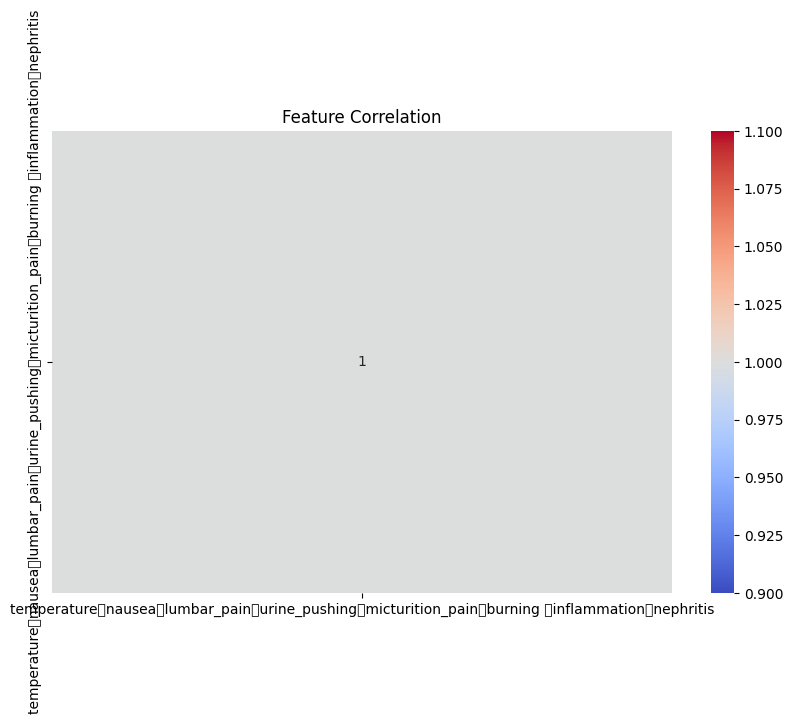

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


Step 5 — Train Test Split

In [14]:
X = df.drop('nephritis', axis=1)
y = df['nephritis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


KeyError: "['nephritis'] not found in axis"

Step 6 — Model Comparison

In [11]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])


In [12]:
models = {
    "Logistic Regression": pipeline_lr,
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

results


NameError: name 'X_train' is not defined

Step 7 — Hyperparameter Tuning (Best Model)

In [13]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid,
                    cv=StratifiedKFold(5), scoring='accuracy')

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

best_model

NameError: name 'X_train' is not defined

Step 8 — Final Evaluation

In [ ]:
preds = best_model.predict(X_test)
probs = best_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, preds))
print("ROC AUC:", roc_auc_score(y_test, probs))
print(classification_report(y_test, preds))


Confusion Matrix


In [ ]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
importances = best_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
feat_imp.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

Step - 9 SHAP Explainability

In [ ]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)


Individual Prediction Explanation

This shows why the model predicted nephritis.

In [ ]:
shap.force_plot(explainer.expected_value[1],
                shap_values[1][0],
                X_test.iloc[0],
                matplotlib=True)

Step 10 Save the Model

In [ ]:
joblib.dump(best_model, 'nephritis_model.pkl')

THANK YOU